In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

# import from data_utils
from data_utils import load_data, column_summary

In [3]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\test.csv' 
df = load_data(file_path) 

In [4]:
df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Id,int64,0,41088,41088
1,Store,int64,0,41088,856
2,DayOfWeek,int64,0,41088,7
3,Date,object,0,41088,48
4,Open,float64,11,41077,2
5,Promo,int64,0,41088,2
6,StateHoliday,object,0,41088,2
7,SchoolHoliday,int64,0,41088,2


In [8]:

# Define a dictionary to map old column names to new column names
new_column_names = {
    'Id': 'store_date_id', 
    'Store': 'store_id',
    'DayOfWeek': 'day_of_week',
    'Date': 'date',
    'Open': 'store_open', 
    'Promo': 'promotion',
    'StateHoliday': 'state_holiday',
    'SchoolHoliday': 'school_holiday'
}
# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)

In [9]:
df.columns

Index(['store_date_id', 'store_id', 'day_of_week', 'date', 'store_open',
       'promotion', 'state_holiday', 'school_holiday'],
      dtype='object')

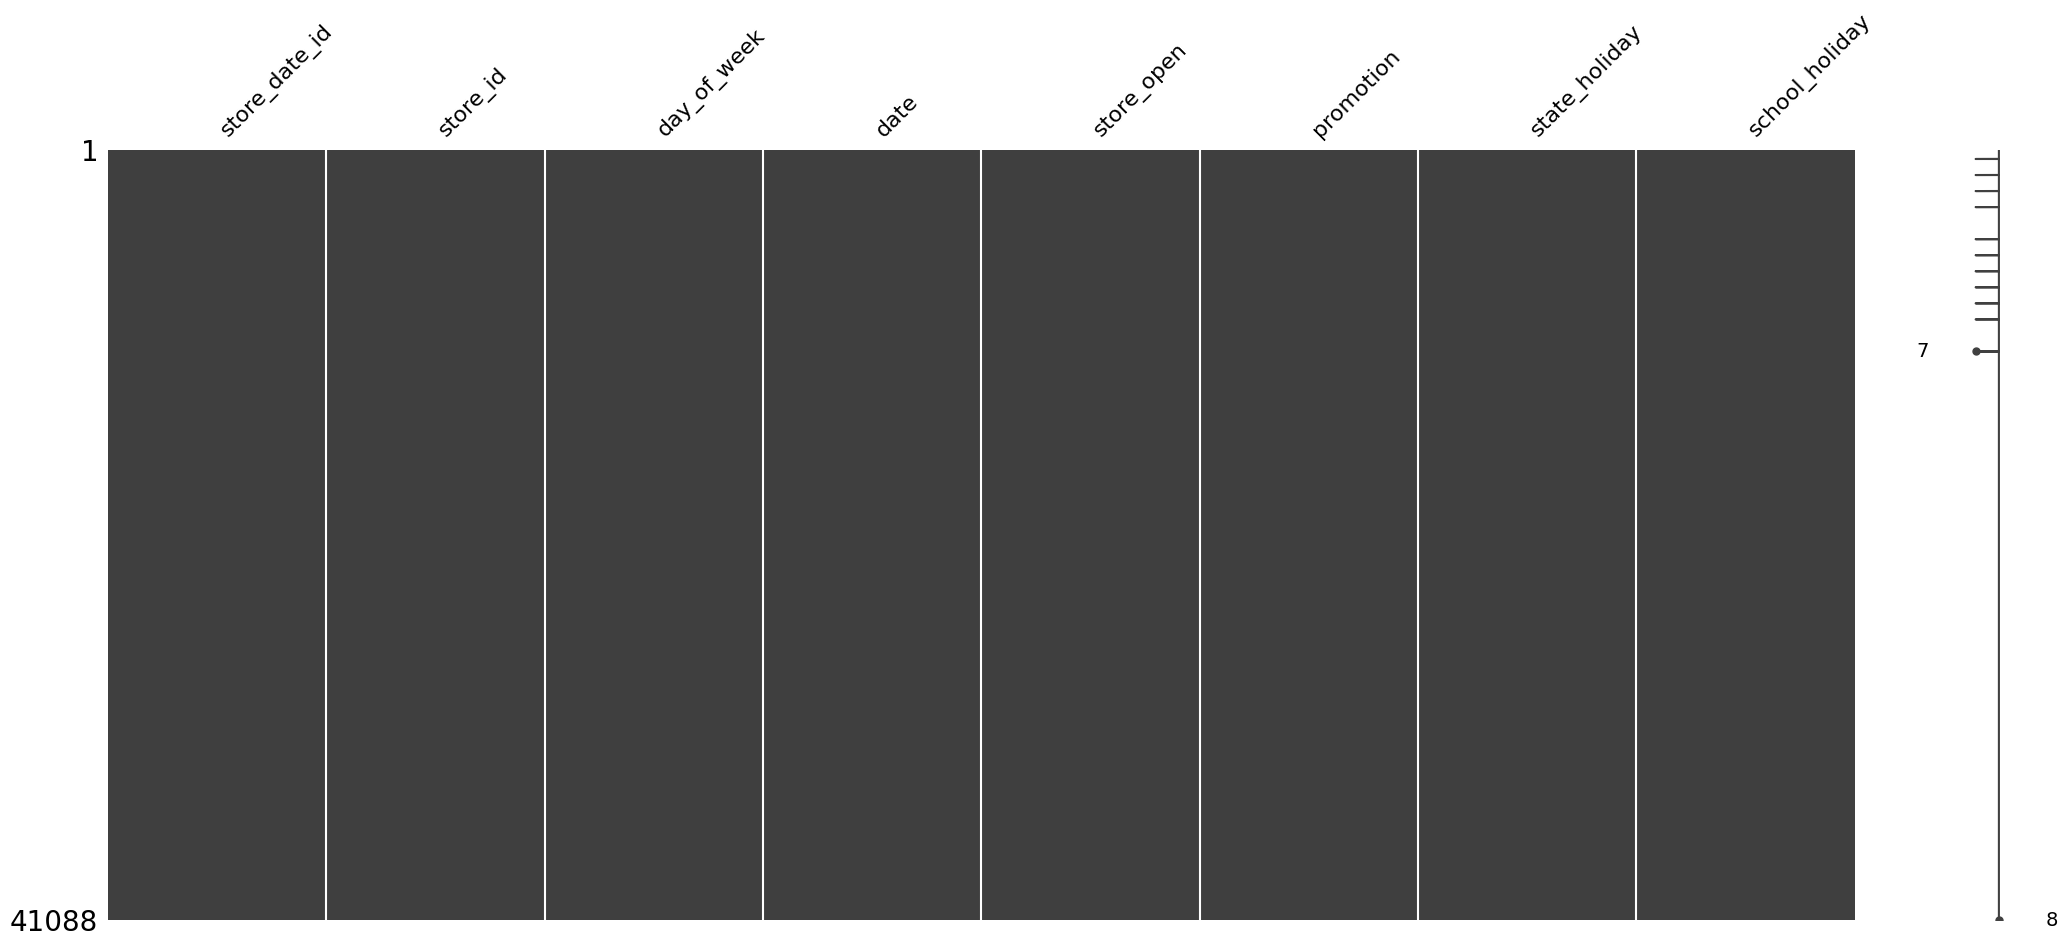

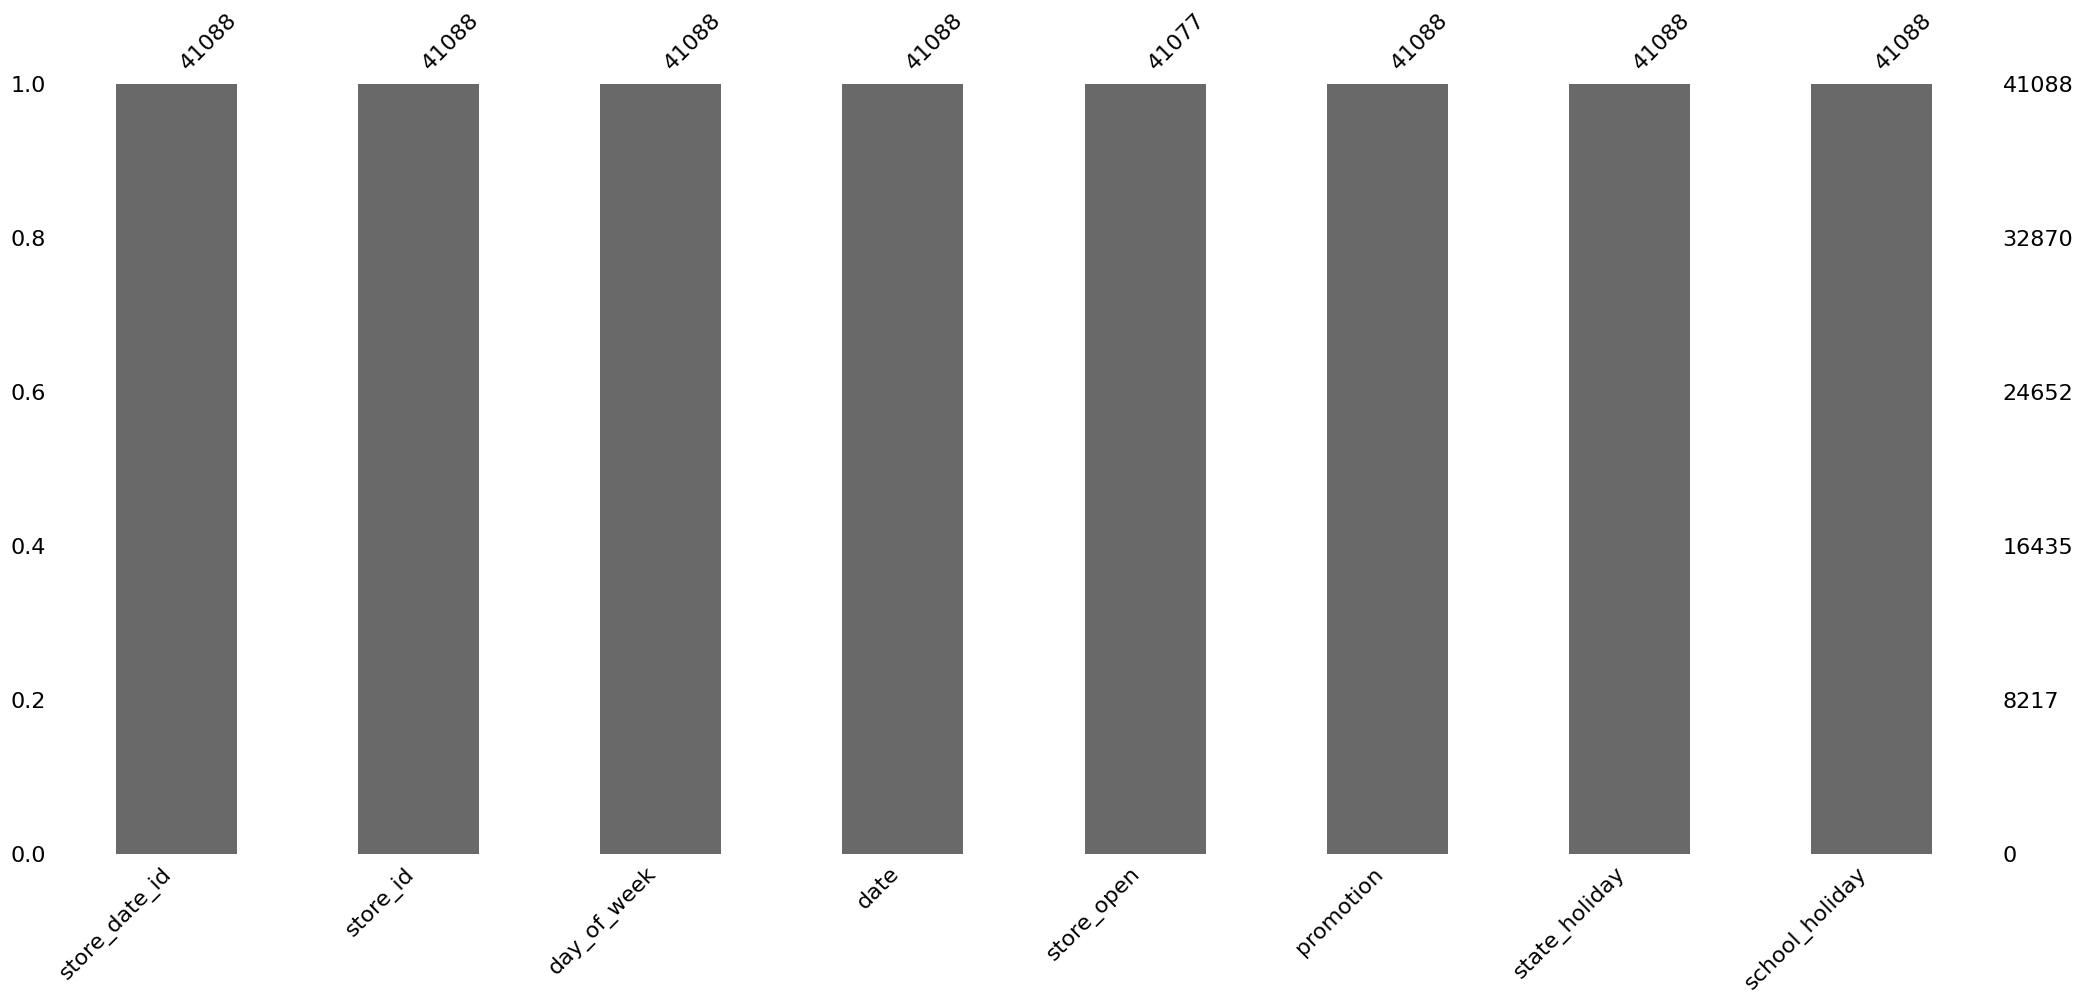

In [10]:
import missingno as msno

# Matrix plot
msno.matrix(df)
plt.show()

# Bar plot
msno.bar(df)
plt.show()

In [11]:
# Checking for summary statistics and duplicates
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe())
print(df.duplicated().sum())

   store_date_id  store_id  day_of_week        date  store_open  promotion state_holiday  school_holiday
0              1         1            4  2015-09-17         1.0          1             0               0
1              2         3            4  2015-09-17         1.0          1             0               0
2              3         7            4  2015-09-17         1.0          1             0               0
3              4         8            4  2015-09-17         1.0          1             0               0
4              5         9            4  2015-09-17         1.0          1             0               0
       store_date_id      store_id   day_of_week    store_open     promotion  school_holiday
count   41088.000000  41088.000000  41088.000000  41077.000000  41088.000000    41088.000000
mean    20544.500000    555.899533      3.979167      0.854322      0.395833        0.443487
std     11861.228267    320.274496      2.015481      0.352787      0.489035        0.49680

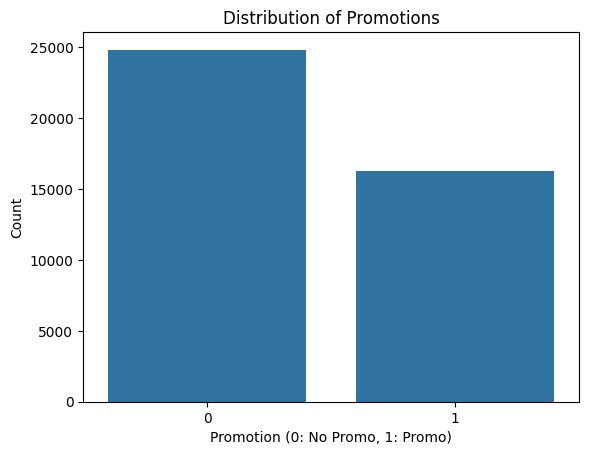

In [12]:
# Create the countplot for 'promotion'
sns.countplot(x='promotion', data=df)

# Customize the plot
plt.title('Distribution of Promotions')
plt.xlabel('Promotion (0: No Promo, 1: Promo)')
plt.ylabel('Count')

# Show the plot
plt.show()

In [14]:
df

,store_date_id,store_id,day_of_week,date,store_open,promotion,state_holiday,school_holiday,holiday,holiday_period
0,1,1,4,2015-09-17,1.0,1,0,0,No Holiday,Non-Holiday
1,2,3,4,2015-09-17,1.0,1,0,0,No Holiday,Non-Holiday
2,3,7,4,2015-09-17,1.0,1,0,0,No Holiday,Non-Holiday
3,4,8,4,2015-09-17,1.0,1,0,0,No Holiday,Non-Holiday
4,5,9,4,2015-09-17,1.0,1,0,0,No Holiday,Non-Holiday
...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,No Holiday,Non-Holiday
41084,41085,1112,6,2015-08-01,1.0,0,0,0,No Holiday,Non-Holiday
41085,41086,1113,6,2015-08-01,1.0,0,0,0,No Holiday,Non-Holiday
41086,41087,1114,6,2015-08-01,1.0,0,0,0,No Holiday,Non-Holiday


In [16]:
df.describe()

,store_date_id,store_id,day_of_week,date,store_open,promotion,school_holiday
count,41088.000000,41088.000000,41088.000000,41088,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,2015-08-24 12:00:00,0.854322,0.395833,0.443487
min,1.000000,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000
std,11861.228267,320.274496,2.015481,NaN,0.352787,0.489035,0.496802


In [ ]:
2015-09-17 2015-08-01

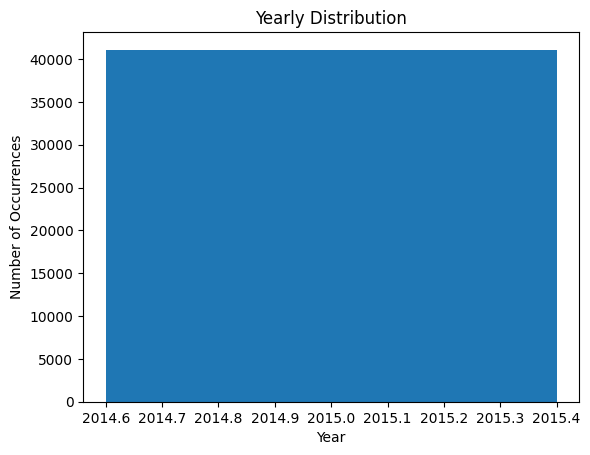

In [18]:
# Extract year
df['Year'] = df['date'].dt.year

# Plot yearly distribution
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Yearly Distribution')
plt.show()